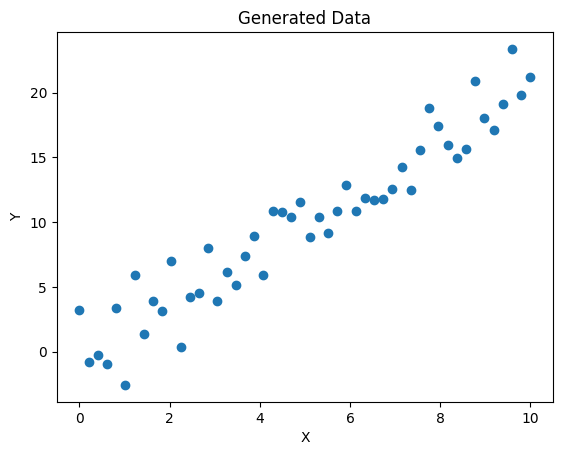

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
X=np.linspace(0,10,50)
Y=2*X+np.random.randn(*X.shape)*2
plt.scatter(X,Y)
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Epoch 0: Loss = 140.2585, w = 1.3559, b = 0.1990
Epoch 10: Loss = 3.8348, w = 1.9749, b = 0.2539
Epoch 20: Loss = 3.8221, w = 1.9801, b = 0.2188
Epoch 30: Loss = 3.8107, w = 1.9851, b = 0.1855
Epoch 40: Loss = 3.8003, w = 1.9899, b = 0.1538
Epoch 50: Loss = 3.7910, w = 1.9944, b = 0.1237
Epoch 60: Loss = 3.7825, w = 1.9986, b = 0.0950
Epoch 70: Loss = 3.7749, w = 2.0027, b = 0.0678
Epoch 80: Loss = 3.7680, w = 2.0066, b = 0.0419
Epoch 90: Loss = 3.7617, w = 2.0103, b = 0.0173


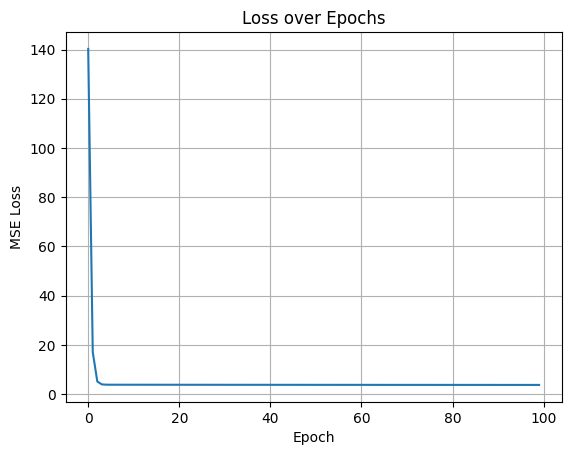

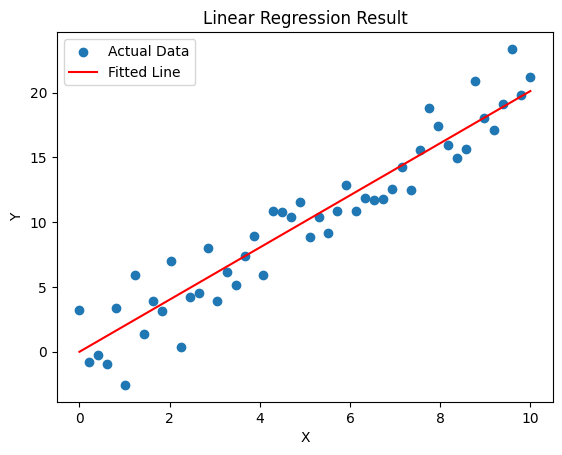

In [12]:
w=0
b=0
lr=0.01
epochs=100
n=len(X)

losses = []

for epoch in range(epochs):
    Y_pred = w * X + b
    loss = (1/n) * np.sum((Y - Y_pred)**2)
    losses.append(loss)

    # Compute gradients
    dw = -(2/n) * np.sum(X * (Y - Y_pred))
    db = -(2/n) * np.sum(Y - Y_pred)

    # Update parameters
    w = w - lr * dw
    b = b - lr * db

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")
#Visualize the loss curve

plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

#Plot the final model
plt.scatter(X, Y, label='Actual Data')
plt.plot(X, w * X + b, color='red', label='Fitted Line')
plt.title("Linear Regression Result")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-15-2554400372>:24: RuntimeWarning: overflow encountered in square
  loss = (1/n) * np.sum((Y - Y_pred)**2)
<ipython-input-15-2554400372>:23: RuntimeWarning: invalid value encountered in multiply
  Y_pred = w * X + b


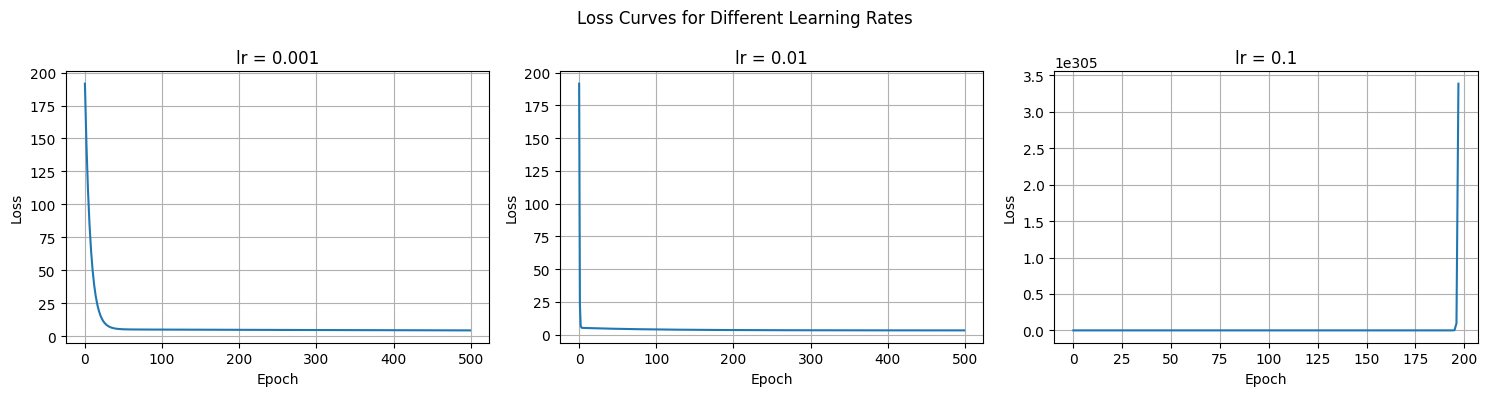

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data: y = 2x + 3 + noise
np.random.seed(42)
X = np.linspace(0, 10, 50)
Y = 2 * X + 3 + np.random.randn(*X.shape) * 2

# Test learning rates
learning_rates = [0.001, 0.01, 0.1]
epochs = 500  # 🔼 Increase epochs to see slow learning
n = len(X)

# Store loss histories
loss_history = {}

# Gradient Descent for each learning rate
for lr in learning_rates:
    w, b = 0, 0
    losses = []

    for epoch in range(epochs):
        Y_pred = w * X + b
        loss = (1/n) * np.sum((Y - Y_pred)**2)
        losses.append(loss)

        dw = -(2/n) * np.sum(X * (Y - Y_pred))
        db = -(2/n) * np.sum(Y - Y_pred)

        w -= lr * dw
        b -= lr * db

    loss_history[str(lr)] = losses

# Plot loss curves in separate subplots for clarity
plt.figure(figsize=(15, 4))

for i, (lr_str, losses) in enumerate(loss_history.items()):
    plt.subplot(1, 3, i+1)
    plt.plot(losses)
    plt.title(f"lr = {lr_str}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)

plt.suptitle("Loss Curves for Different Learning Rates")
plt.tight_layout()
plt.show()